Title: Smart Disaster Supply Chain Tracker for Flood

Description: This project focuses on building an AI-powered system to track relief material demand and supply in real-time during disasters.  
The goal is to ensure efficient distribution of resources (food, water, medicine, shelter kits, etc.) and avoid shortages or wastage and identifying the key areas of risk during crisis situations like floods.

Importing necessary libraries and loading the datasets

In [12]:
import pandas as pd
import numpy as np

flood_inventory = pd.read_csv("../data/raw/India_Flood_Inventory_v3.csv")
district_impact = pd.read_csv("../data/raw/District_FloodImpact.csv")
dfsi = pd.read_csv("../data/raw/DFSI.csv")

Viewing first 5 rows of each dataset

In [13]:
print("Flood Inventory Dataset:")
display(flood_inventory.head())

print("\nDistrict Flood Impact Dataset:")
display(district_impact.head())

print("\nDFSI Dataset:")
display(dfsi.head())

Flood Inventory Dataset:


,Unnamed: 0,UEI,Start Date,End Date,Duration(Days),Main Cause,Location,Districts,State,Latitude,...,Human fatality,Human injured,Human Displaced,Animal Fatality,Description of Casualties/injured,Extent of damage,Event Source,Event Souce ID,District_LGD_Codes,State_Codes
0,563,UEI-IMD-FL-1967-0001,02-07-1967 00:00,08-07-1967 00:00,7.0,flood,NaN,NaN,Assam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IMD,NaN,NaN,18
1,564,UEI-IMD-FL-1967-0002,22-07-1967 00:00,28-07-1967 00:00,7.0,flood,NaN,NaN,"Maharashtra, Gujarat",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IMD,NaN,NaN,"27,24"
2,565,UEI-IMD-FL-1967-0003,01-08-1967 00:00,30-08-1967 00:00,30.0,flood,NaN,NaN,Uttar Pradesh,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IMD,NaN,NaN,9
3,566,UEI-IMD-FL-1967-0004,08-09-1967 00:00,09-09-1967 00:00,2.0,flood,NaN,"Bhadrak, Dhenkanal, Jajapur, Subarnapur, Nuapa...","Odisha, Bihar, Uttar Pradesh, Madhya Pradesh, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,Marooning of Barwer Express,IMD,NaN,"348, 352, 356, None, 368, 345, 349, 350, 359, ...","21,10,9,23,8,6"
4,567,UEI-IMD-FL-1968-0001,22-06-1968 00:00,28-06-1968 00:00,7.0,flood,NaN,NaN,Assam,NaN,...,NaN,NaN,NaN,NaN,NaN,"Affecting about one million people,an area of ...",IMD,NaN,NaN,18



District Flood Impact Dataset:


,Dist_Name,Human_fatality,Human_injured,Population,Mean_Flood_Duration
0,Dadra & Nagar Haveli,10,0,618459,1.0
1,Daman,0,0,190125,NaN
2,Diu,0,0,67412,NaN
3,North & Middle Andaman,0,0,101677,1.0
4,South Andaman,1,0,257900,2.0



DFSI Dataset:


,Unnamed: 0,State_Name,DFSI
0,Patna,BIHAR,19.300564
1,Murshidabad,WEST BENGAL,18.910884
2,Thane,MAHARASHTRA,18.861789
3,Guntur,ANDHRA PRADESH,18.832069
4,North Twenty Four Pargan*,WEST BENGAL,18.770538


Checking basic info

In [14]:
print("Flood Inventory Info:")
flood_inventory.info()

print("\nDistrict Impact Info:")
district_impact.info()

print("\nDFSI Info:")
dfsi.info()

Flood Inventory Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         6876 non-null   int64  
 1   UEI                                6876 non-null   object 
 2   Start Date                         6856 non-null   object 
 3   End Date                           6856 non-null   object 
 4   Duration(Days)                     6857 non-null   float64
 5   Main Cause                         6845 non-null   object 
 6   Location                           0 non-null      float64
 7   Districts                          6817 non-null   object 
 8   State                              6876 non-null   object 
 9   Latitude                           0 non-null      float64
 10  Longitude                          0 non-null      float64
 11  Severity                          

Checking missing values

In [15]:
print("Missing Values in Flood Inventory:")
print(flood_inventory.isnull().sum())

print("\nMissing Values in District Impact:")
print(district_impact.isnull().sum())

print("\nMissing Values in DFSI:")
print(dfsi.isnull().sum())

Missing Values in Flood Inventory:
Unnamed: 0                              0
UEI                                     0
Start Date                             20
End Date                               20
Duration(Days)                         19
Main Cause                             31
Location                             6876
Districts                              59
State                                   0
Latitude                             6876
Longitude                            6876
Severity                             6876
Area Affected                        6876
Human fatality                       3106
Human injured                        5818
Human Displaced                      6754
Animal Fatality                      6305
Description of Casualties/injured    3609
Extent of damage                     3121
Event Source                            0
Event Souce ID                       6876
District_LGD_Codes                    304
State_Codes                           258

Handling missing values

In [16]:
flood_inventory_clean = flood_inventory.dropna()
district_impact_clean = district_impact.dropna()
dfsi_clean = dfsi.dropna()

Saving cleaned datasets for later use

In [17]:
# 7. Save cleaned datasets for later use
flood_inventory_clean.to_csv("../data/processed/clean_India_Flood_Inventory.csv", index=False)
district_impact_clean.to_csv("../data/processed/clean_District_FloodImpact.csv", index=False)
dfsi_clean.to_csv("../data/processed/clean_DFSI.csv", index=False)

print("✅ Cleaned datasets saved successfully in data/processed/")


✅ Cleaned datasets saved successfully in data/processed/


Loading clean datasets

In [18]:
import pandas as pd

# Load
flood_inventory = pd.read_csv("../data/raw/India_Flood_Inventory_v3.csv")
print(flood_inventory.shape)
print(flood_inventory.head())

# Drop rows where Start Date is missing
flood_inventory_clean = flood_inventory.dropna(subset=["Start Date"]).copy()

# Clean and convert Start Date → datetime
flood_inventory_clean["Start Date"] = pd.to_datetime(
    flood_inventory_clean["Start Date"].astype(str).str.strip(),  # ensure strings are clean
    errors="coerce",
    dayfirst=True
)

# Extract year
flood_inventory_clean["Year"] = flood_inventory_clean["Start Date"].dt.year

# Check
print(flood_inventory_clean[["Start Date", "Year"]].head())
print(flood_inventory_clean["Start Date"].dtype)


(6876, 23)
   Unnamed: 0                   UEI        Start Date          End Date  \
0         563  UEI-IMD-FL-1967-0001  02-07-1967 00:00  08-07-1967 00:00   
1         564  UEI-IMD-FL-1967-0002  22-07-1967 00:00  28-07-1967 00:00   
2         565  UEI-IMD-FL-1967-0003  01-08-1967 00:00  30-08-1967 00:00   
3         566  UEI-IMD-FL-1967-0004  08-09-1967 00:00  09-09-1967 00:00   
4         567  UEI-IMD-FL-1968-0001  22-06-1968 00:00  28-06-1968 00:00   

   Duration(Days) Main Cause  Location  \
0             7.0      flood       NaN   
1             7.0      flood       NaN   
2            30.0      flood       NaN   
3             2.0      flood       NaN   
4             7.0      flood       NaN   

                                           Districts  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Bhadrak, Dhenkanal, Jajapur, Subarnapur, Nuapa...   
4    

In [19]:
import pandas as pd

# Load all 3 datasets
flood_inventory_clean = pd.read_csv("../data/processed/India_Flood_Inventory_clean.csv")
dfsi = pd.read_csv("../data/processed/clean_DFSI.csv")
district_impact = pd.read_csv("../data/processed/clean_District_FloodImpact.csv")

# Quick checks
print("Flood Inventory:", flood_inventory_clean.shape)
print(flood_inventory_clean.head(3))
print("DFSI:", dfsi.shape)
print(dfsi.head(3))
print("District Impact:", district_impact.shape)
print(district_impact.head(3))


Flood Inventory: (6797, 23)
   Unnamed: 0                   UEI        Start Date          End Date  \
0         566  UEI-IMD-FL-1967-0004  08-09-1967 00:00  09-09-1967 00:00   
1         569  UEI-IMD-FL-1968-0003  01-07-1968 00:00  30-07-1968 00:00   
2         571  UEI-IMD-FL-1968-0005  01-08-1968 00:00  08-08-1968 00:00   

   Duration(Days)     Main Cause  Location  \
0             2.0          flood       NaN   
1            30.0         floods       NaN   
2             8.0  severe floods       NaN   

                                           Districts  \
0  Bhadrak, Dhenkanal, Jajapur, Subarnapur, Nuapa...   
1  Kasaragod, Wayanad, Kozhikode, Malappuram, Pal...   
2                                              Surat   

                                               State  Latitude  ...  \
0  Odisha, Bihar, Uttar Pradesh, Madhya Pradesh, ...       NaN  ...   
1   Kerala, Rajasthan, Haryana, Uttar Pradesh, Bihar       NaN  ...   
2                                            Guj

Performing EDA - Visualizing before Scaling

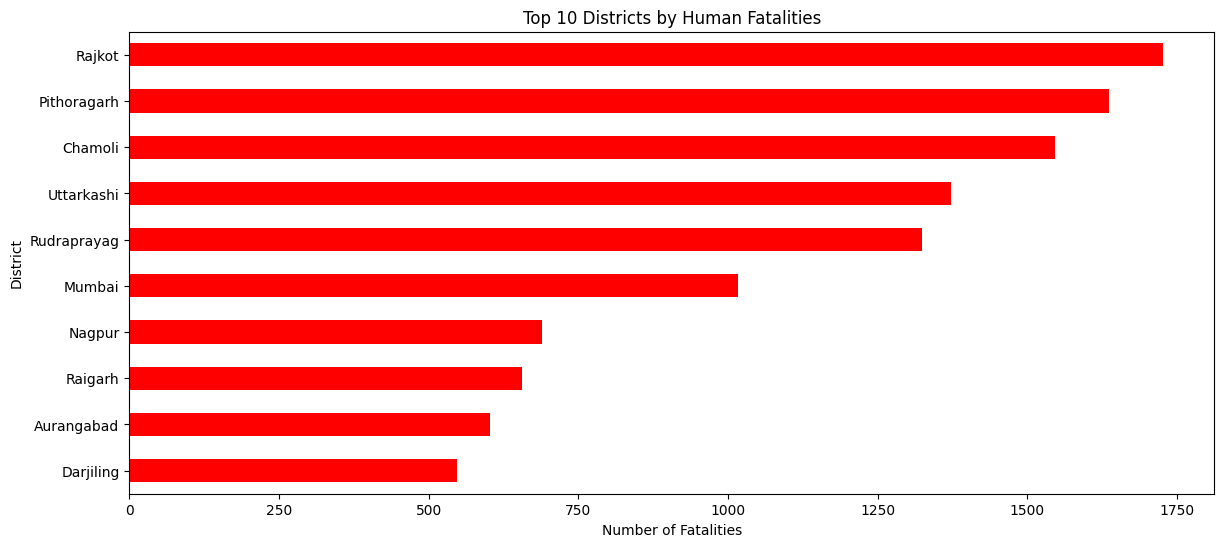

In [ ]:
plt.figure(figsize=(14,6))
top_fatalities = district_impact.groupby("Dist_Name")["Human_fatality"].sum().sort_values(ascending=False).head(10)
top_fatalities.plot(kind="barh", color="red")
plt.title("Top 10 Districts by Human Fatalities")
plt.xlabel("Number of Fatalities")
plt.ylabel("District")
plt.gca().invert_yaxis()
plt.show()


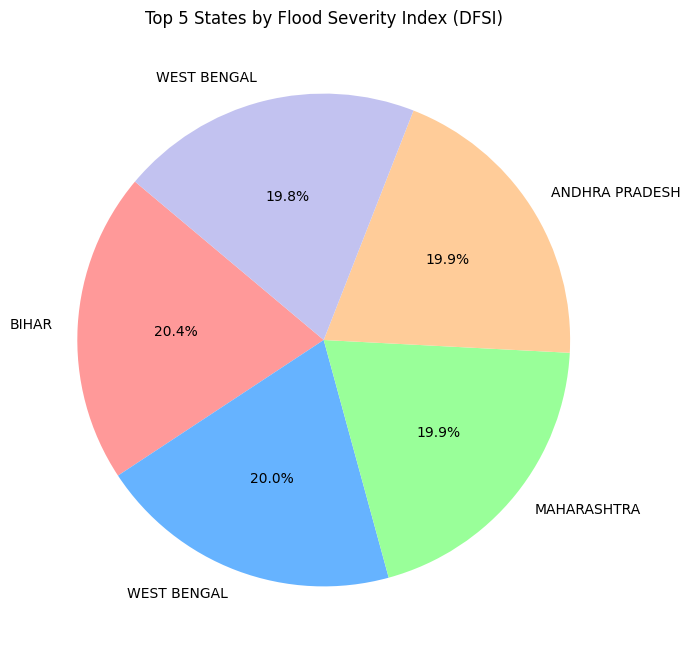

In [ ]:
top_states = dfsi.sort_values(by="DFSI", ascending=False).head(5)
plt.figure(figsize=(8,8))
plt.pie(top_states["DFSI"], labels=top_states["State_Name"], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title("Top 5 States by Flood Severity Index (DFSI)")
plt.show()


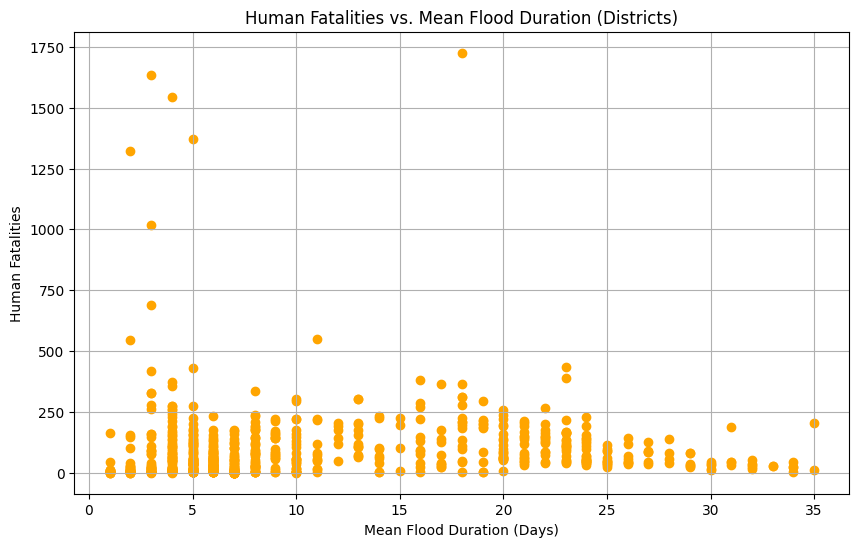

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(district_impact["Mean_Flood_Duration"], district_impact["Human_fatality"], color='orange')
plt.title("Human Fatalities vs. Mean Flood Duration (Districts)")
plt.xlabel("Mean Flood Duration (Days)")
plt.ylabel("Human Fatalities")
plt.grid(True)
plt.show()

Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 1: Clean numeric columns (coerce errors → NaN, then fill with 0 or median)
district_numeric = district_impact[["Human_fatality", "Human_injured", "Population", "Mean_Flood_Duration"]].apply(pd.to_numeric, errors="coerce").fillna(0)

flood_numeric = flood_inventory_clean[["Duration(Days)", "Human fatality", "Human injured", "Human Displaced", "Animal Fatality", "Area Affected"]].apply(pd.to_numeric, errors="coerce").fillna(0)

# Step 2: Apply scaling
minmax_scaler = MinMaxScaler()
district_scaled_minmax = minmax_scaler.fit_transform(district_numeric)
flood_scaled_minmax = minmax_scaler.fit_transform(flood_numeric)

standard_scaler = StandardScaler()
district_scaled_standard = standard_scaler.fit_transform(district_numeric)
flood_scaled_standard = standard_scaler.fit_transform(flood_numeric)

# Step 3: Convert back to DataFrames
district_scaled_df = pd.DataFrame(district_scaled_standard, columns=district_numeric.columns)
flood_scaled_df = pd.DataFrame(flood_scaled_standard, columns=flood_numeric.columns)

print("District Impact (scaled):")
print(district_scaled_df.head())

print("\nFlood Inventory (scaled):")
print(flood_scaled_df.head())


District Impact (scaled):
   Human_fatality  Human_injured  Population  Mean_Flood_Duration
0       -0.531851      -0.291125   -0.771943            -1.185508
1       -0.597267      -0.291125   -1.073064            -1.185508
2       -0.590726      -0.291125   -0.982035            -1.064746
3        0.344729      -0.291125    0.456436            -0.581699
4       -0.185144       1.694150    0.291574            -0.219414

Flood Inventory (scaled):
   Duration(Days)  Human fatality  Human injured  Human Displaced  \
0       -0.161119       -0.131098      -0.060388         -0.03808   
1        2.689180       -0.131098      -0.060388         -0.03808   
2        0.449659       -0.131098      -0.060388         -0.03808   
3        0.449659       -0.131098      -0.060388         -0.03808   
4       -0.059323       -0.131098      -0.060388         -0.03808   

   Animal Fatality  Area Affected  
0        -0.030269            0.0  
1        -0.030269            0.0  
2        -0.030269          

EDA after Scaling

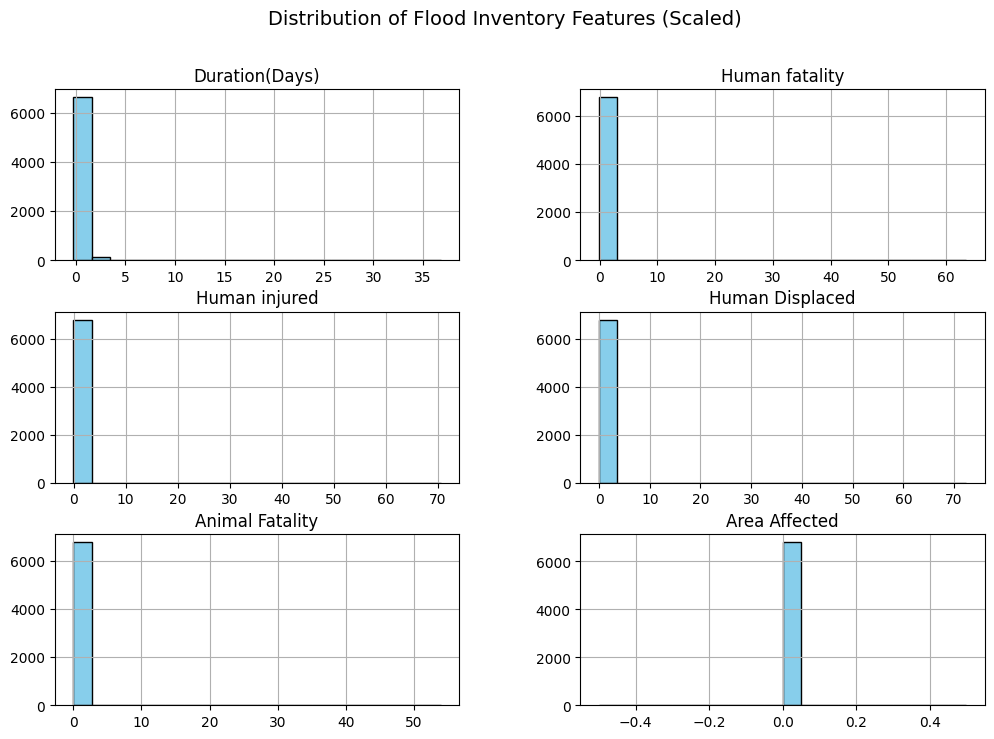

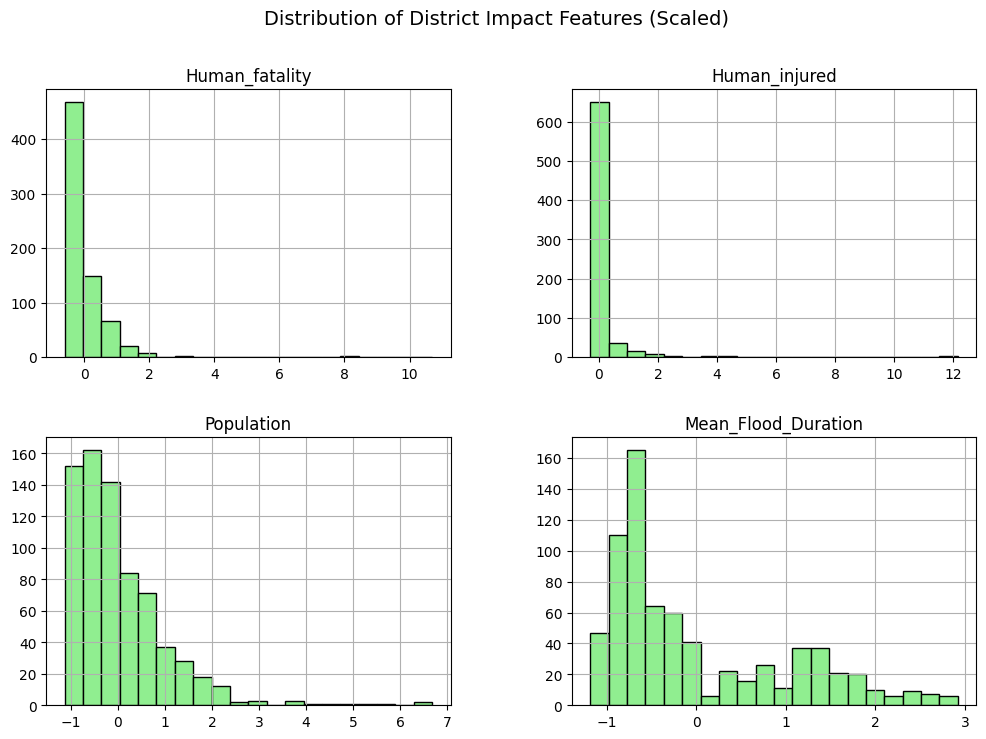

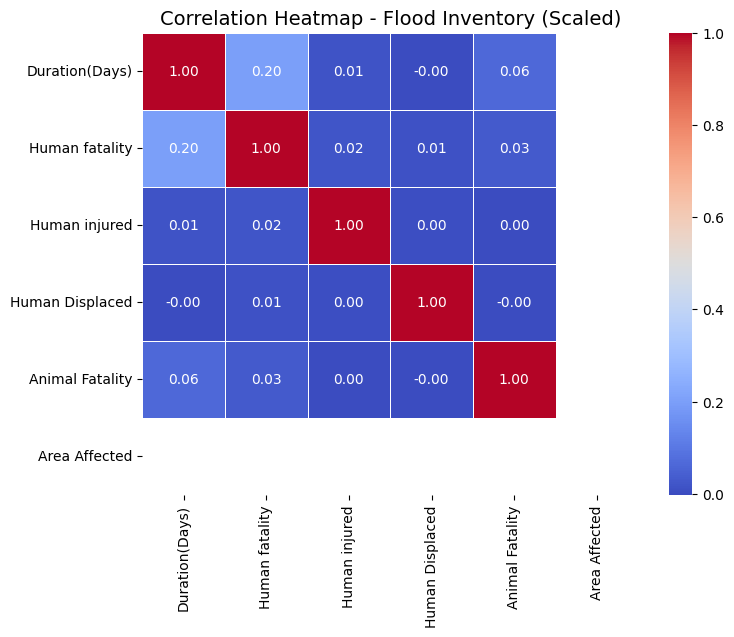

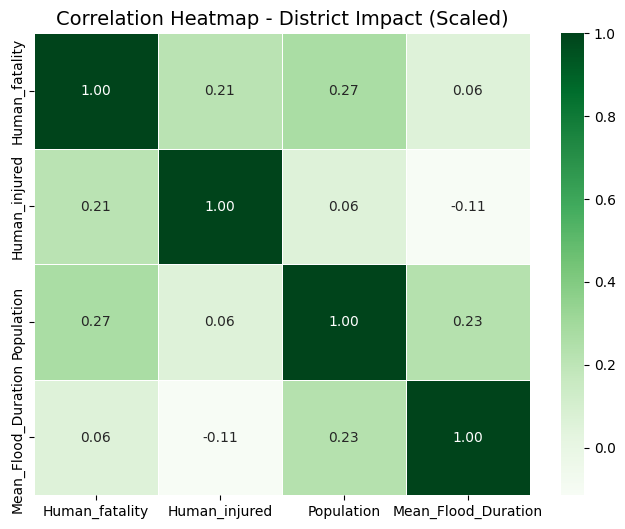

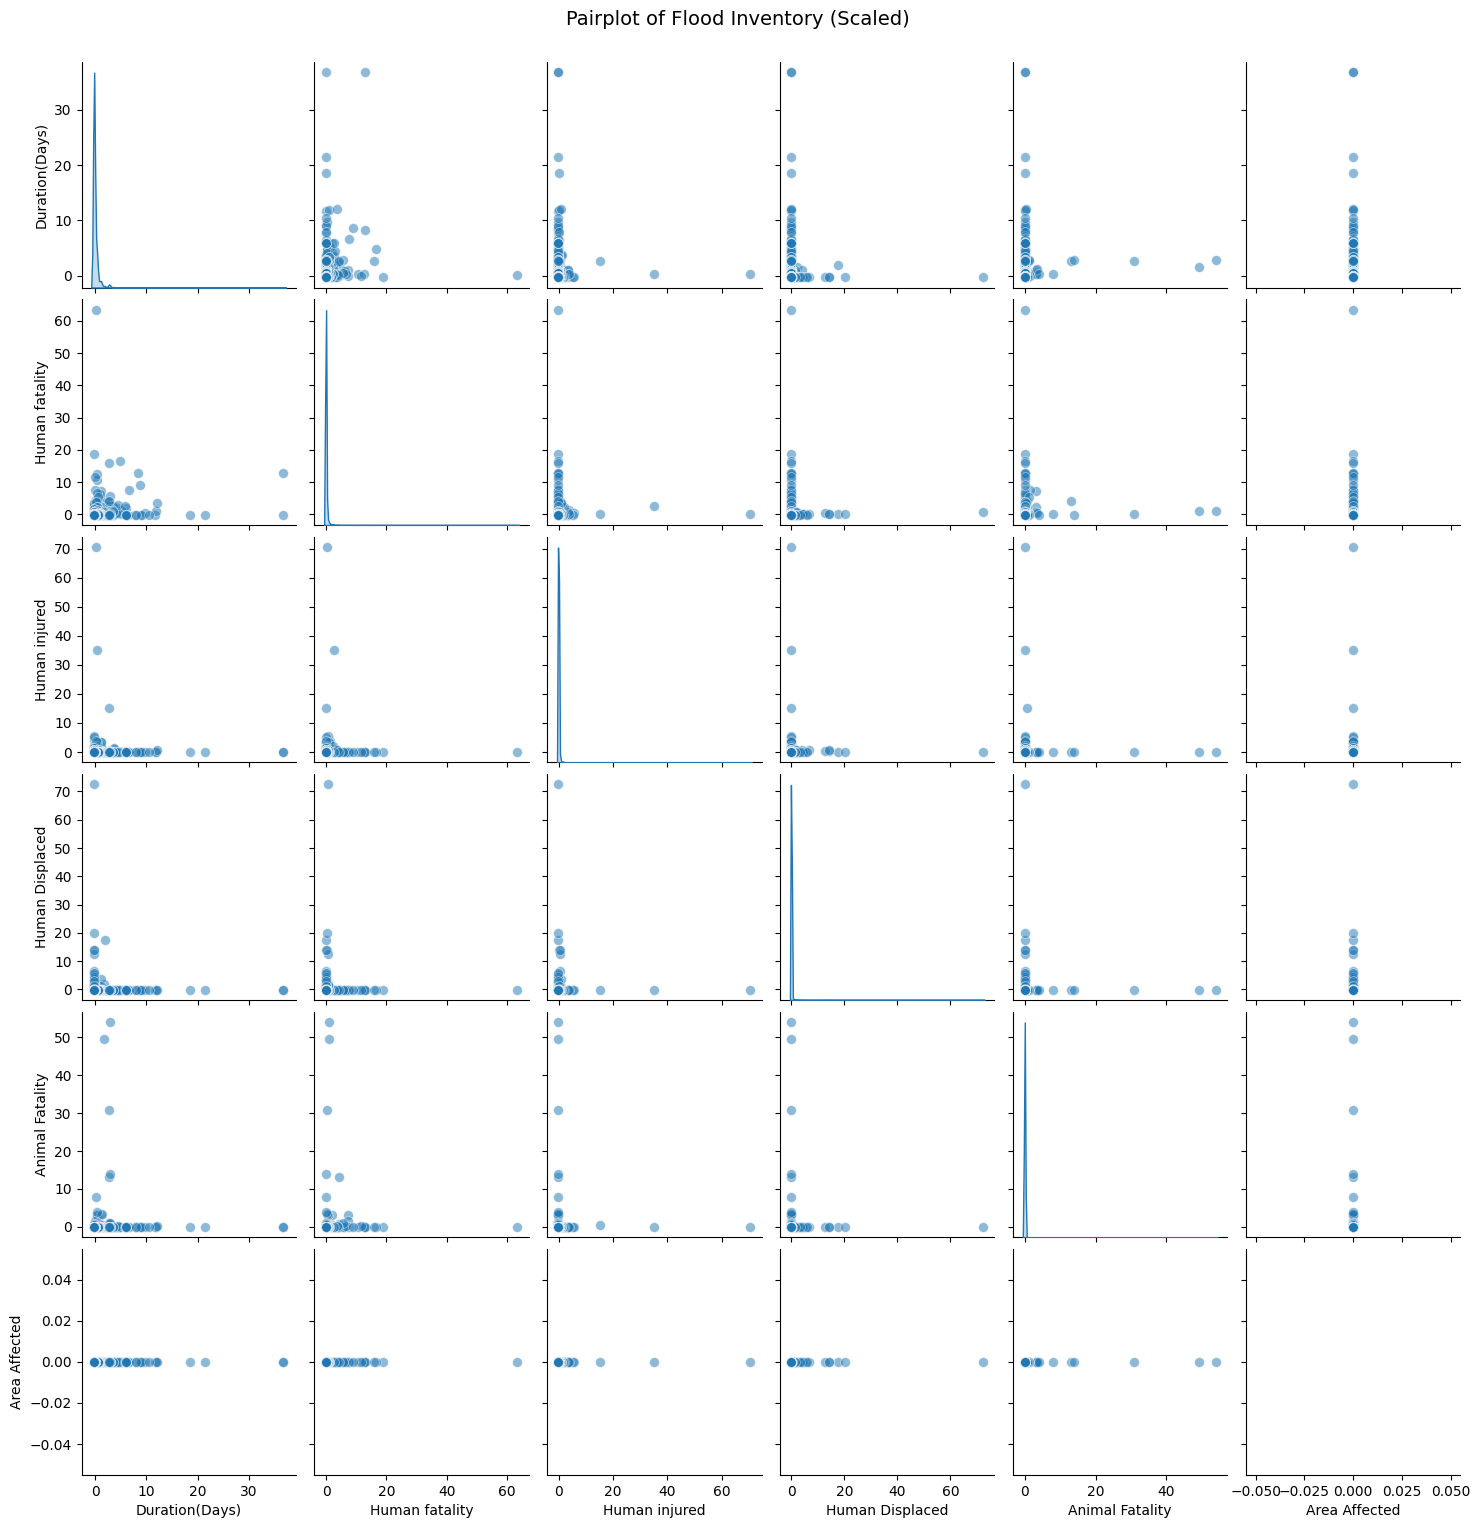

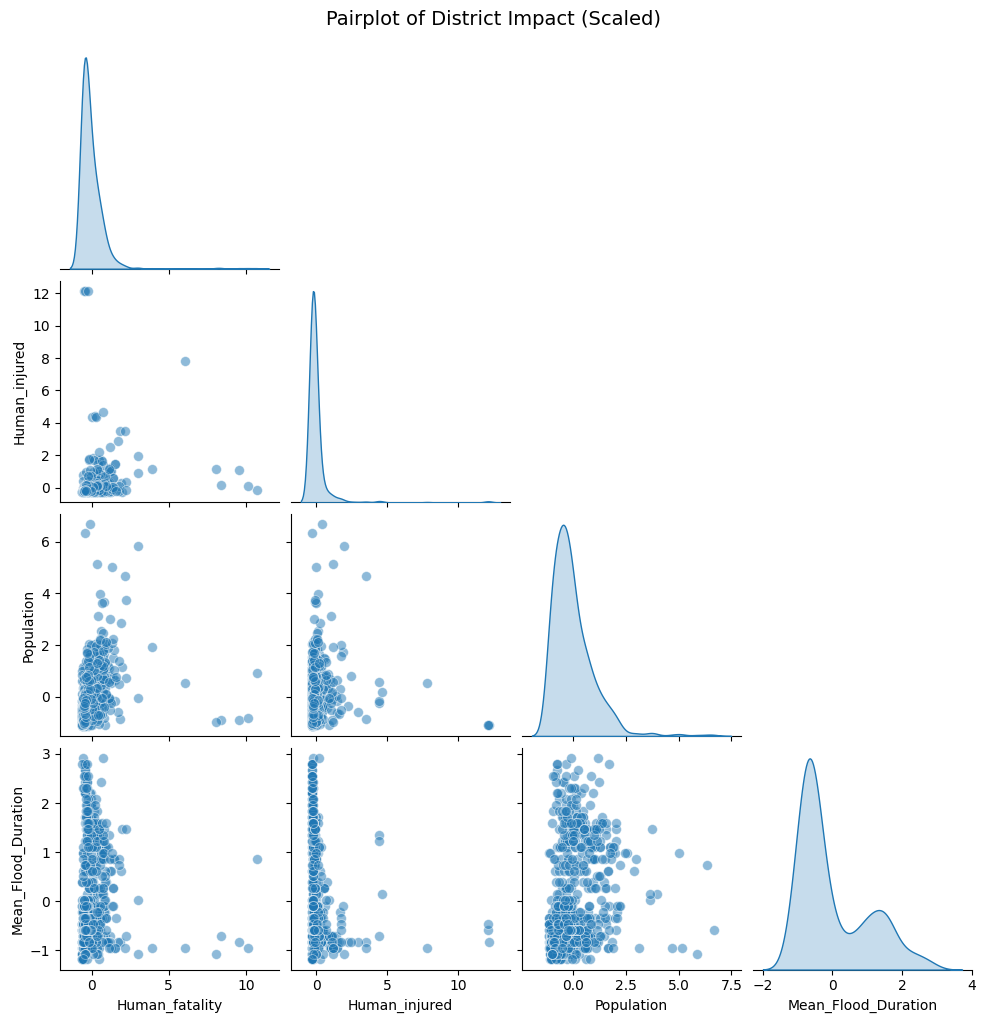

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms (Flood Inventory)
flood_scaled_df.hist(figsize=(12,8), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Flood Inventory Features (Scaled)", fontsize=14)
plt.show()

# 2. Histograms (District Impact)
district_scaled_df.hist(figsize=(12,8), bins=20, color="lightgreen", edgecolor="black")
plt.suptitle("Distribution of District Impact Features (Scaled)", fontsize=14)
plt.show()

# 3. Correlation Heatmap (Flood Inventory)
plt.figure(figsize=(8,6))
sns.heatmap(flood_scaled_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Flood Inventory (Scaled)", fontsize=14)
plt.show()

# 4. Correlation Heatmap (District Impact)
plt.figure(figsize=(8,6))
sns.heatmap(district_scaled_df.corr(), annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - District Impact (Scaled)", fontsize=14)
plt.show()

# 5. Pairplot (Flood Inventory - to see relationships)
sns.pairplot(flood_scaled_df, diag_kind="kde", plot_kws={'alpha':0.5, 's':50})
plt.suptitle("Pairplot of Flood Inventory (Scaled)", y=1.02, fontsize=14)
plt.show()

# 6. Pairplot (District Impact - to see relationships)
sns.pairplot(district_scaled_df, diag_kind="kde", plot_kws={'alpha':0.5, 's':50}, corner=True)
plt.suptitle("Pairplot of District Impact (Scaled)", y=1.02, fontsize=14)
plt.show()


Feature Engineering

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from rapidfuzz import process, fuzz

# 1. Strip column names
for df in [district_impact, flood_inventory_clean, dfsi]:
    df.columns = df.columns.str.strip()

# 2. Clean and standardize names
district_impact['Dist_Name_clean'] = district_impact['Dist_Name'].str.strip().str.lower()
flood_inventory_clean['Districts_clean'] = flood_inventory_clean['Districts'].str.strip().str.lower()

if 'State' in district_impact.columns and 'State_Name' in dfsi.columns:
    district_impact['State_clean'] = district_impact['State'].str.strip().str.lower()
    dfsi['State_Name_clean'] = dfsi['State_Name'].str.strip().str.lower()

# 3. District Impact Features
for col in ["Human_fatality", "Human_injured", "Population", "Mean_Flood_Duration"]:
    if col in district_impact.columns:
        district_impact[col] = pd.to_numeric(district_impact[col], errors='coerce').fillna(0)

district_impact['Fatalities_per_1000'] = (district_impact['Human_fatality'] / district_impact['Population']) * 1000
district_impact['Injured_per_1000'] = (district_impact['Human_injured'] / district_impact['Population']) * 1000
district_impact[['Fatalities_per_1000','Injured_per_1000']] = \
    district_impact[['Fatalities_per_1000','Injured_per_1000']].fillna(0)

district_impact['Impact_Score'] = (
    0.5 * district_impact['Fatalities_per_1000'] +
    0.5 * district_impact['Injured_per_1000'] +
    0.1 * district_impact['Mean_Flood_Duration']
)

# 4. Flood Inventory Features
for col in ["Duration(Days)", "Human fatality", "Human injured", "Human Displaced", "Animal Fatality", "Area Affected"]:
    if col in flood_inventory_clean.columns:
        flood_inventory_clean[col] = pd.to_numeric(flood_inventory_clean[col], errors='coerce').fillna(0)

flood_inventory_clean['Start Date'] = pd.to_datetime(flood_inventory_clean['Start Date'], errors='coerce')
flood_inventory_clean['Year'] = flood_inventory_clean['Start Date'].dt.year
flood_inventory_clean['Month'] = flood_inventory_clean['Start Date'].dt.month

flood_inventory_clean['Event_Impact'] = (
    0.4 * flood_inventory_clean['Human fatality'] +
    0.3 * flood_inventory_clean['Human injured'] +
    0.2 * flood_inventory_clean['Human Displaced'] +
    0.1 * flood_inventory_clean['Area Affected']
)

# 5. Flood statistics per district
flood_freq = flood_inventory_clean.groupby('Districts_clean').size().reset_index(name='Flood_Count')
flood_stats = flood_inventory_clean.groupby('Districts_clean')['Duration(Days)'].agg(
    Avg_Flood_Duration='mean', Max_Flood_Duration='max', Total_Flood_Duration='sum'
).reset_index()
event_impact = flood_inventory_clean.groupby('Districts_clean')['Event_Impact'].sum().reset_index()

# 6. Fuzzy matching districts
district_names = flood_inventory_clean['Districts_clean'].unique()
def get_best_match(name):
    match = process.extractOne(name, district_names, scorer=fuzz.token_sort_ratio)
    return match[0] if match and match[1] > 80 else None

district_impact['Districts_clean_match'] = district_impact['Dist_Name_clean'].apply(get_best_match)

# 7. Merge all features
district_flood = district_impact.merge(
    flood_freq, left_on='Districts_clean_match', right_on='Districts_clean', how='left'
).merge(
    flood_stats, left_on='Districts_clean_match', right_on='Districts_clean', how='left'
).merge(
    event_impact, left_on='Districts_clean_match', right_on='Districts_clean', how='left'
)

# Fill missing numeric values
for col in ['Flood_Count','Avg_Flood_Duration','Max_Flood_Duration','Total_Flood_Duration','Event_Impact']:
    district_flood[col] = district_flood[col].fillna(0)

# 8. Merge with DFSI
if 'State_clean' in district_flood.columns and 'State_Name_clean' in dfsi.columns:
    district_flood = district_flood.merge(
        dfsi[['State_Name_clean','DFSI']],
        left_on='State_clean', right_on='State_Name_clean', how='left'
    )
    district_flood['DFSI'] = district_flood['DFSI'].fillna(0)
else:
    district_flood['DFSI'] = 0

# 9. Population Density
district_flood['Population_Density'] = district_flood['Population'] / district_flood['Population'].max()

# 10. Compute Supply Priority Score
district_flood['Supply_Priority_Score'] = (
    0.4 * district_flood['Impact_Score'] +
    0.2 * district_flood['Flood_Count'] +
    0.2 * district_flood['DFSI'] +
    0.1 * district_flood['Population_Density'] +
    0.1 * district_flood['Event_Impact']
)

# Scale Supply_Priority_Score 0-1
district_flood['Supply_Priority_Score'] = MinMaxScaler().fit_transform(
    district_flood[['Supply_Priority_Score']]
)

# Assign Supply Priority Level
bins_priority = [0, 0.33, 0.66, 1]
labels_priority = ['Low', 'Medium', 'High']
district_flood['Supply_Priority_Level'] = pd.cut(
    district_flood['Supply_Priority_Score'], bins=bins_priority, labels=labels_priority, include_lowest=True
)

# 11. Recompute Impact Level based on scaled Impact_Score
district_flood['Impact_Level'] = pd.cut(
    MinMaxScaler().fit_transform(district_flood[['Impact_Score']]).flatten(),
    bins=[0,0.33,0.66,1],
    labels=['Low','Medium','High'],
    include_lowest=True
)

# 12. Drop helper columns
helper_cols = ['Districts_clean_x','Districts_clean_y','Districts_clean_match','State_clean','State_Name_clean']
existing_helpers = [col for col in helper_cols if col in district_flood.columns]
district_flood = district_flood.drop(columns=existing_helpers)

# 13. Save final dataset
district_flood.to_csv("district_flood_engineered_final.csv", index=False)
print(district_flood.head())


                 Dist_Name  Human_fatality  Human_injured  Population  \
0     Dadra & Nagar Haveli              10              0      618459   
1  North  & Middle Andaman               0              0      101677   
2            South Andaman               1              0      257900   
3               Srikakulam             144              0     2726592   
4             Vizianagaram              63            107     2443656   

   Mean_Flood_Duration  Fatalities_per_1000  Injured_per_1000  Impact_Score  \
0                  1.0             0.016169          0.000000      0.108085   
1                  1.0             0.000000          0.000000      0.100000   
2                  2.0             0.003877          0.000000      0.201939   
3                  6.0             0.052813          0.000000      0.626407   
4                  9.0             0.025781          0.043787      0.934784   

  Impact_Level          Dist_Name_clean  Flood_Count  Avg_Flood_Duration  \
0         

Creating a new dataset with our target so that it can be used to train our model

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# 1. Load dataset
df = pd.read_csv("district_flood_engineered_final.csv")

# 2. Select features and target
features = [
    'Impact_Score', 'Flood_Count', 'DFSI', 'Population_Density',
    'Fatalities_per_1000','Injured_per_1000','Event_Impact',
    'Avg_Flood_Duration','Max_Flood_Duration','Total_Flood_Duration'
]
target = 'Supply_Priority_Level'

X = df[features].copy()
y = df[target].copy()

# 3. Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Low=0, Medium=1, High=2

# 4. Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = smote.fit_resample(X, y_encoded)

# 5. Combine into a new DataFrame
df_resampled = pd.DataFrame(X_res, columns=features)
df_resampled[target] = label_encoder.inverse_transform(y_res)

# 6. Check class distribution
print(df_resampled[target].value_counts())

# 7. Save the augmented dataset
df_resampled.to_csv("district_flood_augmented.csv", index=False)
print("✅ Augmented dataset saved as 'district_flood_augmented.csv'")


Supply_Priority_Level
Low       714
High      714
Medium    714
Name: count, dtype: int64
✅ Augmented dataset saved as 'district_flood_augmented.csv'


Training the model using Random Forest and Logistic Regression

Random Forest Results
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       143
           2       1.00      1.00      1.00       143

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



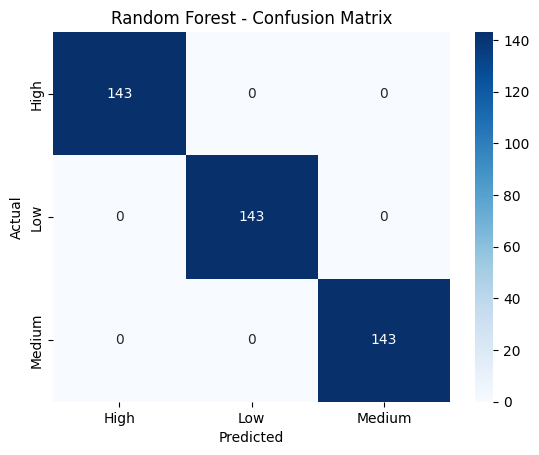

c:\Users\Anees Fathima\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Results
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       143
           2       1.00      1.00      1.00       143

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



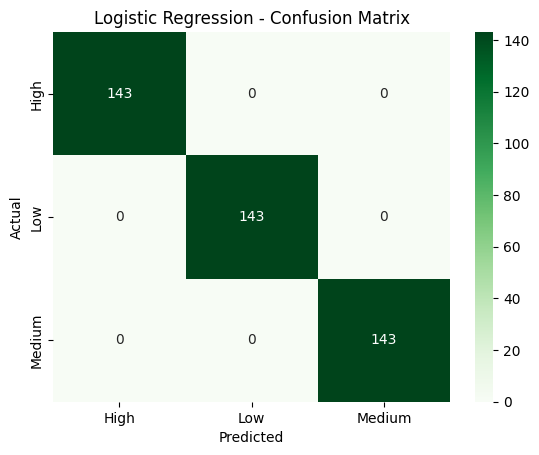

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the augmented dataset
df = pd.read_csv("district_flood_augmented.csv")

# 2. Select features and target
features = [
    'Impact_Score', 'Flood_Count', 'DFSI', 'Population_Density',
    'Fatalities_per_1000','Injured_per_1000','Event_Impact',
    'Avg_Flood_Duration','Max_Flood_Duration','Total_Flood_Duration'
]
target = 'Supply_Priority_Level'

X = df[features].copy()
y = df[target].copy()

# 3. Encode target (Low=0, Medium=1, High=2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 5. Scale features (for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))

# Confusion matrix
rf_cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(rf_cm, annot=True, fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 7. Logistic Regression
lr = LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("\nClassification Report:\n", classification_report(y_test, lr_preds))

# Confusion matrix
lr_cm = confusion_matrix(y_test, lr_preds)
sns.heatmap(lr_cm, annot=True, fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="Greens")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Dumping and saving the model so that it can be used later

In [ ]:
import joblib
#logistic regression is not used as random forest performed well for testing data
# Save Random Forest
joblib.dump(rf, "random_forest_supply_priority.pkl")


['random_forest_supply_priority.pkl']

Testing the model

In [26]:
new_data = pd.DataFrame({
    'Impact_Score': [0.8, 0.3],
    'Flood_Count': [5, 1],
    'DFSI': [0.7, 0.2],
    'Population_Density': [1000, 300],
    'Fatalities_per_1000': [0.05, 0],
    'Injured_per_1000': [0.1, 0],
    'Event_Impact': [0.9, 0.2],
    'Avg_Flood_Duration': [4, 1],
    'Max_Flood_Duration': [6, 1],
    'Total_Flood_Duration': [20, 5]
})

rf_preds_new = rf.predict(new_data)
rf_probs_new = rf.predict_proba(new_data)

for i, (pred, probs) in enumerate(zip(rf_preds_new, rf_probs_new)):
    confidence = max(probs) * 100
    print(f"Sample {i+1}: Predicted Class = {pred}, Confidence = {confidence:.2f}%")


Sample 1: Predicted Class = 1, Confidence = 99.50%
Sample 2: Predicted Class = 1, Confidence = 100.00%


Defining and mapping the risk labels for Supply Chain Logistics

In [27]:
# Mapping predicted class numbers to risk labels
risk_labels = {0: "Low", 1: "Moderate", 2: "High"}

# Define actions for each risk level
def supply_action(pred):
    if pred == 2:  # High Risk
        return "Pre-position large relief stock, deploy rescue teams, set up medical camps"
    elif pred == 1:  # Moderate Risk
        return "Prepare moderate stock, alert local authorities, keep rescue teams on standby"
    else:  # Low Risk
        return "Routine monitoring, no immediate large-scale action needed"

# Show predictions, confidence, and suggested action
for i, (pred, probs) in enumerate(zip(rf_preds_new, rf_probs_new)):
    confidence = max(probs) * 100
    risk = risk_labels[pred]
    action = supply_action(pred)
    print(f"Sample {i+1}: Risk = {risk}, Confidence = {confidence:.2f}%, Suggested Action = {action}")


Sample 1: Risk = Moderate, Confidence = 99.50%, Suggested Action = Prepare moderate stock, alert local authorities, keep rescue teams on standby
Sample 2: Risk = Moderate, Confidence = 100.00%, Suggested Action = Prepare moderate stock, alert local authorities, keep rescue teams on standby
